In [1]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [9]:
!pip install kaggle

In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp kaggle.json ~/.kaggle

In [12]:
!kaggle datasets download -d elinachen717/municipal-solid-waste-dataset

Dataset URL: https://www.kaggle.com/datasets/elinachen717/municipal-solid-waste-dataset
License(s): CC0-1.0
  0% 0.00/4.81M [00:00<?, ?B/s]
100% 4.81M/4.81M [00:00<00:00, 517MB/s]


In [13]:
!unzip /content/municipal-solid-waste-dataset.zip

Archive:  /content/municipal-solid-waste-dataset.zip
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_100.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1000.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1004.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1005.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1007.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1008.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1009.jpeg  
  inflating: Dataset/Biodegradable Images/TRAIN.1_BIODEG_ORI_10035.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10025.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10043.jpg  
  inflating: Dataset/Biodegradable Im

In [5]:
import os
import shutil
import random

input_dir = 'dataset'
output_dir = 'output_dataset'
split_ratio = 0.8

classes = os.listdir(input_dir)

for cls in classes:
    class_dir = os.path.join(input_dir, cls)
    
    # Skip if it's not a directory
    if not os.path.isdir(class_dir):
        continue

    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    random.shuffle(images)
    split_point = int(len(images) * split_ratio)
    train_images = images[:split_point]
    val_images = images[split_point:]

    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))

    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))


In [7]:

# Define directories
dataset_dir = 'output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir=os.path.join(dataset_dir, 'test')
# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224) # Common size for many models like ResNet, VGG, MobileNet
# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator (rescale=1./255)
# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=IMG_SIZE,
batch_size=32,
class_mode='binary' # Assuming binary classification for healthy vs rotten
)
val_generator = val_test_datagen.flow_from_directory(
val_dir,
target_size=IMG_SIZE,
batch_size=32,
class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory( test_dir,
target_size=IMG_SIZE,
batch_size=32,
class_mode='binary',
shuffle=False # Do not shuffle test data
)
# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 343 images belonging to 5 classes.
Found 116 images belonging to 5 classes.
Found 52 images belonging to 3 classes.
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2, 'test': 3, 'train': 4}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2, 'test': 3, 'train': 4}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'test': 2}


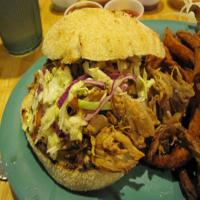

In [9]:

import random
from IPython.display import Image, display
# Specify the path to your image folder
folder_path = 'output_dataset/train/Biodegradable Images' # Replace with the actual path to your image folder
# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', 'jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

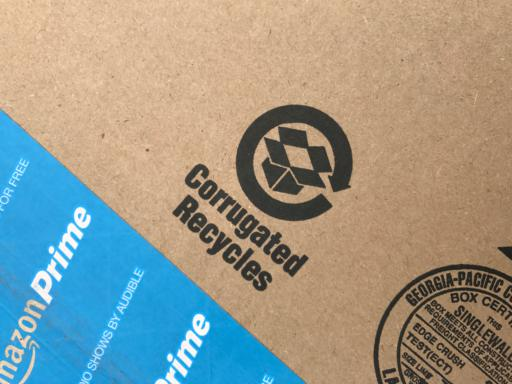

In [10]:

folder_path = 'output_dataset/test/Recyclable Images' # Replace with the actual path to your image folder
# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

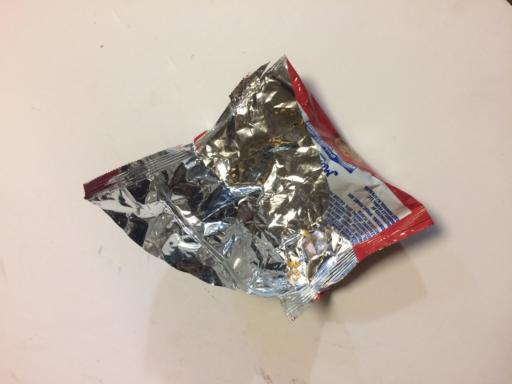

In [12]:

folder_path = 'output_dataset/test/Trash Images' # Replace with the actual path to your image folder
# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display (Image(filename=image_path))

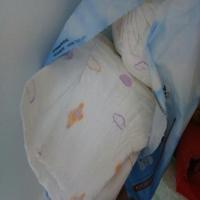

In [19]:

folder_path = '/content/output_dataset/train/Trash Images' # Replace with the actual path to your image folder
# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display (Image(filename=image_path))

In [13]:

trainpath = "output_dataset/train"
testpath="output_dataset/test"
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224), batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224), batch_size = 20)

Found 343 images belonging to 5 classes.
Found 182 images belonging to 4 classes.


In [14]:
vgg=VGG16(include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 34s 1us/step


In [15]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [16]:
for layer in vgg.layers:
  layer.trainable=False

In [17]:
x=Flatten()(vgg.output)

In [18]:
output=Dense(3,activation='softmax')(x)

In [19]:
vgg16=Model(vgg.input,output)

In [20]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

num_classes = train.num_classes  # ✅ define this before using it

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze the base

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # ✅ now this works
])


In [24]:

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [25]:

labels=[0,1,2]


In [27]:
img_path='output_dataset/train/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg'

In [28]:
import numpy as np
img=load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


array([[9.9968648e-01, 5.6829502e-10, 3.1349392e-04]], dtype=float32)

In [29]:
labels [np.argmax(preds)]

0

test 2


In [32]:
img_path='output_dataset/test/Recyclable Images/cardboard149.jpeg'

In [33]:
import numpy as np
img=load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


array([[9.999666e-01, 2.301082e-06, 3.114096e-05]], dtype=float32)

In [34]:
labels [np.argmax(preds)]

0

test 3

In [36]:
img_path='output_dataset/train/Trash Images/TRAIN.4_NBIODEG_CCW_1778.jpg'
import numpy as np
img=load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds
labels [np.argmax(preds)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


1

test 4

In [39]:
img_path='output_dataset/test/Recyclable Images/paper11.jpeg'
import numpy as np
img=load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds
labels [np.argmax(preds)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2

In [45]:
img_path = 'output_dataset/test/Recyclable Images/glass180.jpeg'
import numpy as np
img=load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds
labels [np.argmax(preds)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


0

In [46]:
vgg16.save('internship12.keras')